In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [41]:
new_df=df.sample(30000,random_state=2)

In [42]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0


In [43]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [44]:
new_df.duplicated().sum()

0

In [45]:
new_df['is_duplicate'].value_counts()

0    19013
1    10987
Name: is_duplicate, dtype: int64

In [46]:
(new_df['is_duplicate'].value_counts()/new_df['is_duplicate'].count())*100

0    63.376667
1    36.623333
Name: is_duplicate, dtype: float64

<AxesSubplot:>

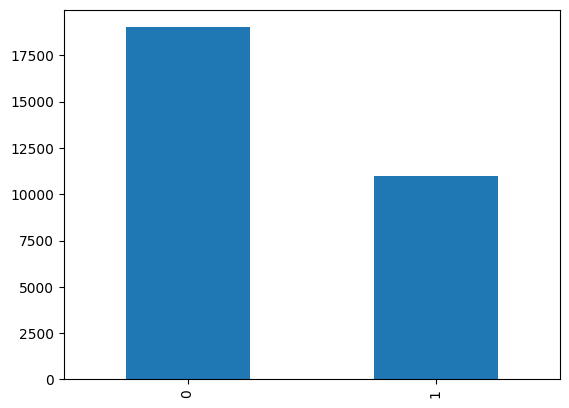

In [47]:
new_df['is_duplicate'].value_counts().plot(kind='bar')

In [48]:
qid=pd.Series(new_df['qid1'].tolist()+new_df['qid2'].tolist())
print('Number of unique Word  : ',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique Word  :  55299
Number of questions getting repeated 3480


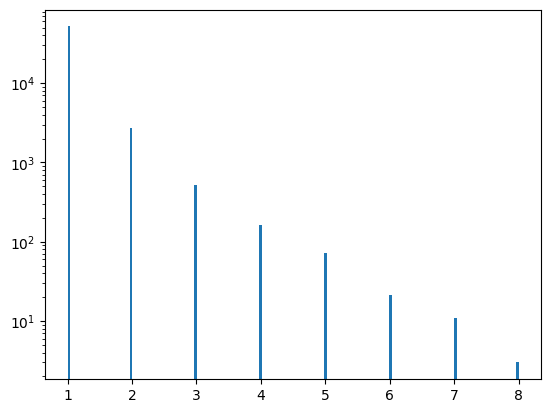

In [49]:
plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()


In [50]:
# Feature Engineering 

new_df['q1_len'] = new_df['question1'].str.len() 
new_df['q2_len'] = new_df['question2'].str.len()

In [51]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50


In [52]:
new_df['q1_num_word']=new_df['question1'].apply(lambda x:len(x.split(" ")))
new_df['q2_num_word']=new_df['question2'].apply(lambda x:len(x.split(" ")))



In [53]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_word,q2_num_word
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9


In [54]:
def common_word(row):
    w1=set(map(lambda word : word.lower().strip(),row['question1'].split(" ")))
    w2=set(map(lambda word : word.lower().strip(),row['question2'].split(" ")))
    
    return len(w1 & w2)

In [55]:
new_df['word_common']=new_df.apply(common_word,axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_word,q2_num_word,word_common
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,11
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,7
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,2
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,0
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,3


In [56]:
def total_word(row):
    w1=set(map(lambda word : word.lower().strip(),row['question1'].split(" ")))
    w2=set(map(lambda word : word.lower().strip(),row['question2'].split(" ")))
    
    return (len(w1)+len(w2))

In [57]:
new_df['total_word']=new_df.apply(total_word,axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_word,q2_num_word,word_common,total_word
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,11,24
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,7,23
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,2,34
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,0,32
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,3,13


In [58]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_word,q2_num_word,word_common,total_word
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,11,24
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,7,23
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,2,34
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,0,32
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,3,13


In [60]:
new_df['word_share']=round(new_df['word_common']/new_df['total_word'],2)

new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_word,q2_num_word,word_common,total_word,word_share
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,11,24,0.46
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,7,23,0.30
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,2,34,0.06
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,0,32,0.00
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,3,13,0.23


minimun character :  2
maxiimun character :  391
Average character :  59


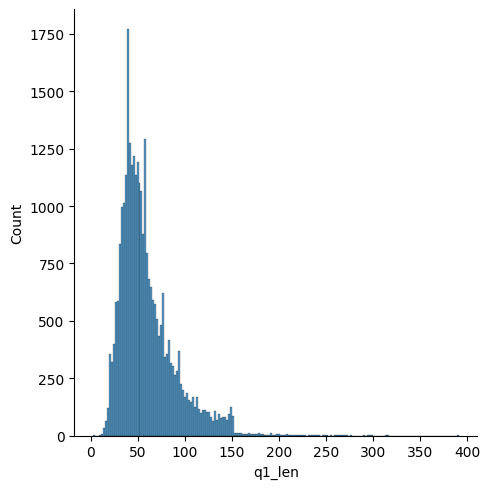

In [61]:
sns.displot(new_df['q1_len'])
print("minimun character : ",new_df['q1_len'].min())
print("maxiimun character : ",new_df['q1_len'].max())
print("Average character : ",int(new_df['q1_len'].mean()))

minimun character :  6
maxiimun character :  1151
Average character :  60


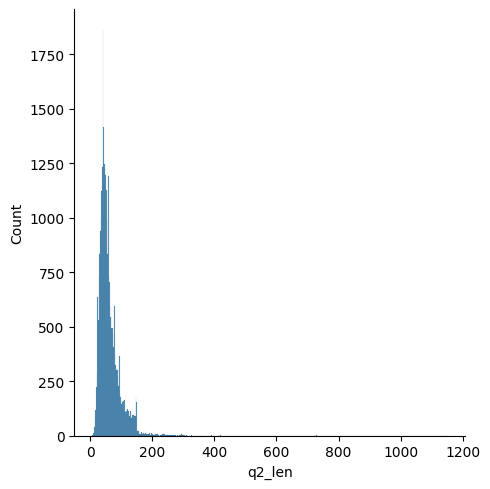

In [62]:
sns.displot(new_df['q2_len'])
print("minimun character : ",new_df['q2_len'].min())
print("maxiimun character : ",new_df['q2_len'].max())
print("Average character : ",int(new_df['q2_len'].mean()))

minimun character :  1
maxiimun character :  72
Average character :  10


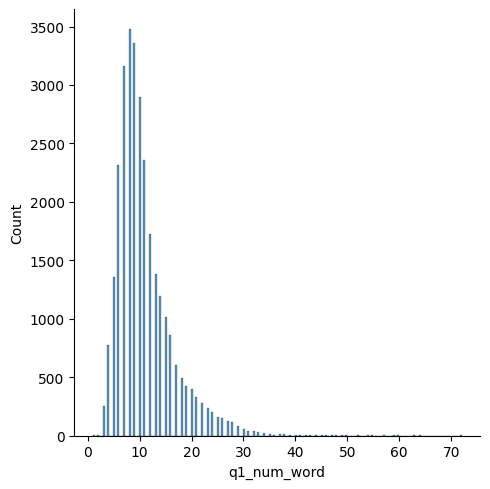

In [63]:
sns.displot(new_df['q1_num_word'])
print("minimun character : ",new_df['q1_num_word'].min())
print("maxiimun character : ",new_df['q1_num_word'].max())
print("Average character : ",int(new_df['q1_num_word'].mean()))

minimun character :  1
maxiimun character :  237
Average character :  11


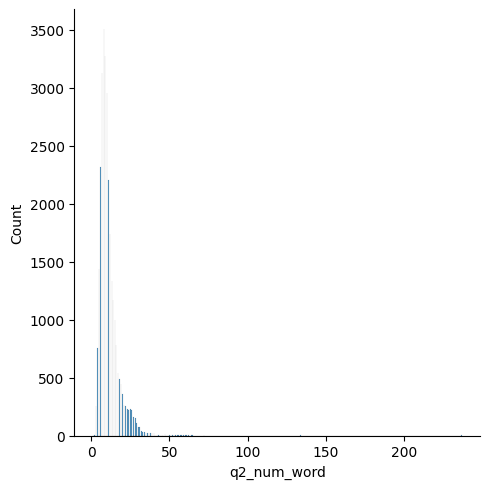

In [64]:
sns.displot(new_df['q2_num_word'])
print("minimun character : ",new_df['q2_num_word'].min())
print("maxiimun character : ",new_df['q2_num_word'].max())
print("Average character : ",int(new_df['q2_num_word'].mean()))

C:\Users\Hp\AppData\Local\Temp\ipykernel_12808\1551430817.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate']==0]['word_common'],label='Non Duplicate')
C:\Users\Hp\AppData\Local\Temp\ipykernel_12808\1551430817.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_

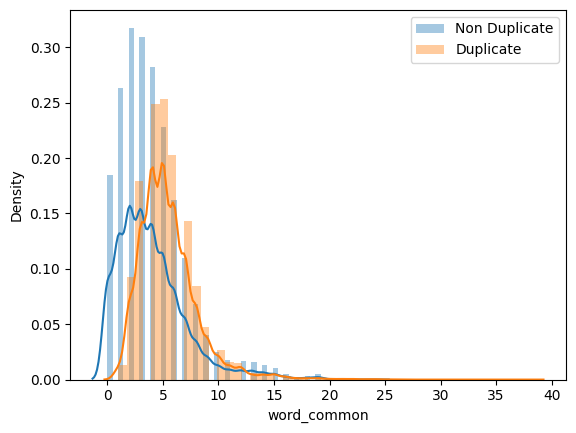

In [66]:
sns.distplot(new_df[new_df['is_duplicate']==0]['word_common'],label='Non Duplicate')
sns.distplot(new_df[new_df['is_duplicate']==1]['word_common'],label='Duplicate')
plt.legend()
plt.show()

C:\Users\Hp\AppData\Local\Temp\ipykernel_12808\1063123094.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate']==0]['total_word'],label='Non Duplicate')
C:\Users\Hp\AppData\Local\Temp\ipykernel_12808\1063123094.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_d

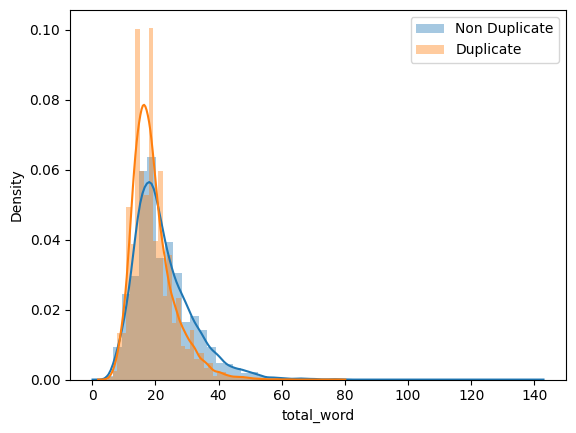

In [67]:
sns.distplot(new_df[new_df['is_duplicate']==0]['total_word'],label='Non Duplicate')
sns.distplot(new_df[new_df['is_duplicate']==1]['total_word'],label='Duplicate')
plt.legend()
plt.show()

C:\Users\Hp\AppData\Local\Temp\ipykernel_12808\1747339132.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate']==0]['word_share'],label='Non Duplicate')
C:\Users\Hp\AppData\Local\Temp\ipykernel_12808\1747339132.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_d

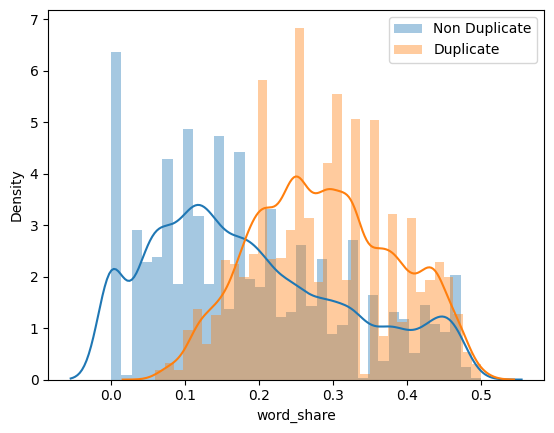

In [68]:
sns.distplot(new_df[new_df['is_duplicate']==0]['word_share'],label='Non Duplicate')
sns.distplot(new_df[new_df['is_duplicate']==1]['word_share'],label='Duplicate')
plt.legend()
plt.show()

In [69]:
ques_df=new_df[['question1','question2']]
ques_df.head()

,question1,question2
398782,What is the best marketing automation tool for...,What is the best marketing automation tool for...
115086,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...
327711,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...
367788,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...
151235,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...


In [70]:
final_df=new_df.drop(['id','qid1','qid2','question1','question2'],axis=1)
final_df.head()

,is_duplicate,q1_len,q2_len,q1_num_word,q2_num_word,word_common,total_word,word_share
398782,1,76,77,12,12,11,24,0.46
115086,0,49,57,12,15,7,23,0.30
327711,0,105,120,25,17,2,34,0.06
367788,0,59,146,12,30,0,32,0.00
151235,0,35,50,5,9,3,13,0.23


In [72]:
from sklearn.feature_extraction.text import CountVectorizer

questions=list(ques_df['question1'])+list(ques_df['question1'])

cv=CountVectorizer(max_features=3000)

q1_arr,q2_arr=np.vsplit(cv.fit_transform(questions).toarray(),2)

In [74]:
temp_df1=pd.DataFrame(q1_arr,index=ques_df.index)
temp_df2=pd.DataFrame(q2_arr,index=ques_df.index)

temp_df=pd.concat([temp_df1,temp_df2],axis=1)

temp_df.shape

(30000, 6000)

In [75]:
final_df=pd.concat([final_df,temp_df],axis=1)
print(final_df.shape)
final_df

(30000, 6008)


,is_duplicate,q1_len,q2_len,q1_num_word,q2_num_word,word_common,total_word,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
398782,1,76,77,12,12,11,24,0.46,0,0,...,0,0,0,0,0,0,0,0,0,0
115086,0,49,57,12,15,7,23,0.30,0,0,...,0,0,0,0,0,0,0,0,0,0
327711,0,105,120,25,17,2,34,0.06,0,0,...,0,0,0,0,0,0,0,0,0,0
367788,0,59,146,12,30,0,32,0.00,0,0,...,0,0,0,0,0,0,0,0,0,0
151235,0,35,50,5,9,3,13,0.23,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243932,1,42,41,7,7,6,14,0.43,0,0,...,0,0,0,0,0,0,0,0,0,0
91980,0,68,61,12,12,4,24,0.17,0,0,...,0,0,0,0,0,0,0,0,0,0
266955,0,73,98,14,17,4,30,0.13,0,0,...,0,0,1,0,0,0,0,0,0,0
71112,1,51,45,10,10,5,20,0.25,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
final_df.iloc[:,0].values

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

In [77]:
final_df.iloc[:,1:].values

array([[ 76.,  77.,  12., ...,   0.,   0.,   0.],
       [ 49.,  57.,  12., ...,   0.,   0.,   0.],
       [105., 120.,  25., ...,   0.,   0.,   0.],
       ...,
       [ 73.,  98.,  14., ...,   0.,   0.,   0.],
       [ 51.,  45.,  10., ...,   0.,   0.,   0.],
       [ 87.,  77.,  15., ...,   0.,   0.,   0.]])

In [78]:
from sklearn.model_selection import train_test_split


X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7675

In [81]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred=xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.7618333333333334